In [2]:
from IPython.display import Image 
!ls ../input/advertising

sales.jpg  sales2.jpg


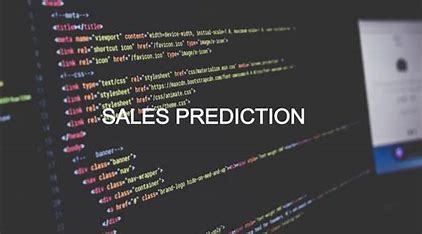

In [3]:
Image("/kaggle/input/advertising/sales.jpg")

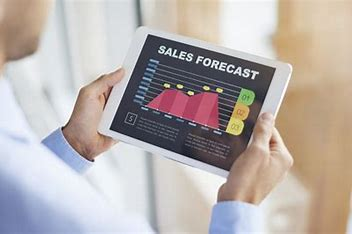

In [4]:
Image("/kaggle/input/advertising/sales2.jpg")

# Importing Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [17]:
df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Inspection

In [13]:
df.shape

(200, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Exploration

In [18]:
print(df.isna().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Data Cleaning

In [19]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

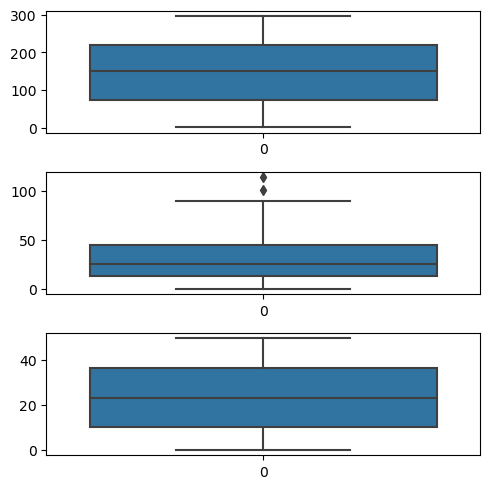

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

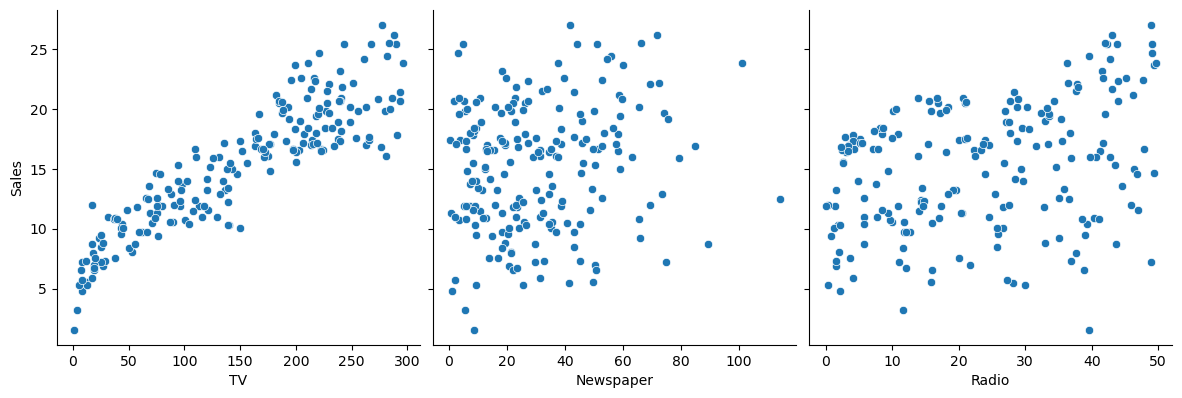

In [23]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


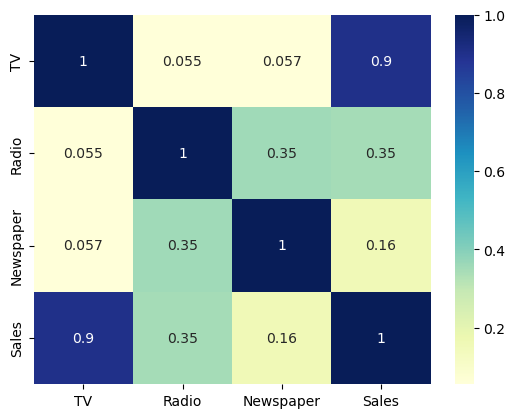

In [22]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Data Visualization

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

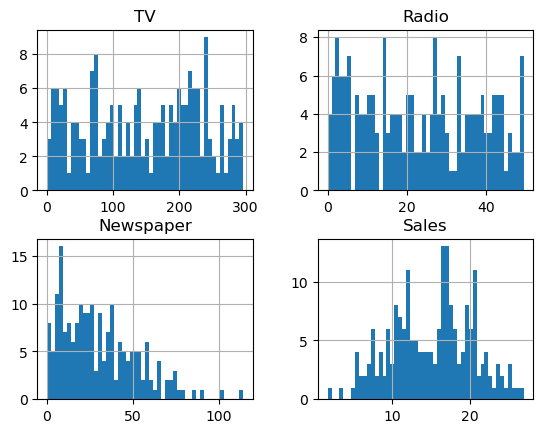

In [4]:
df.hist(bins=50)

# Data Splitiong into testing and training

In [5]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [25]:
# Let's now take a look at the train dataset

x_train.head()

,TV,Radio,Newspaper
131,265.2,2.9,43.0
96,197.6,3.5,5.9
181,218.5,5.4,27.4
19,147.3,23.9,19.1
153,171.3,39.7,37.7


In [26]:
y_train.head()

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
Name: Sales, dtype: float64

# Model Training

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(x,y)

LinearRegression()

# Model Efficiency

In [10]:
reg.score(x,y)*100

90.25912899684559

In [11]:
print("Cofficient",reg.coef_)
print("Intercept",reg.intercept_)

Cofficient [0.05444578 0.10700123 0.00033566]
Intercept 4.625124078808653


In [12]:
print('              Predicted Output\n',reg.predict(x_test))

              Predicted Output
 [10.5924398   8.59480345  9.58691025 24.94140428 14.73822063  8.30485298
 10.35633677 18.48158513  9.69879662 17.88150523 23.43911942 10.64410416
 13.43232243 17.11095629 11.64919966 13.27062458 21.2260486   8.90340499
 13.99342411 18.88048094 24.90888356 12.47019032 16.57668108 13.77606971
  7.75915886 15.03380429 14.71726516 20.61884334 17.08301809  8.75617872
 12.27105794 20.76038994 21.40779104 21.85850312  7.06177654  6.94582943
  9.16857418 15.64413685 13.12271953  7.17325114 10.78643994  8.97313482
 15.54479137 18.24477648 18.89730805 13.3867616   5.31839603 10.25121926
 15.4438881  10.94160634 12.14402868 20.60147616 20.73265903 16.94655913
  9.8263967   9.37145421 23.61492832 15.96404812 18.04712878  8.04320903]


# Building a Linear Model

In [13]:
import statsmodels.api as sm

In [29]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [30]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const        4.669247
TV           0.053650
Radio        0.110731
Newspaper    0.002037
dtype: float64

In [31]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     494.3
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           6.39e-73
Time:                        12:04:54   Log-Likelihood:                -253.79
No. Observations:                 140   AIC:                             515.6
Df Residuals:                     136   BIC:                             527.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6692      0.339     13.782      0.0

# Model Evaluation

In [38]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

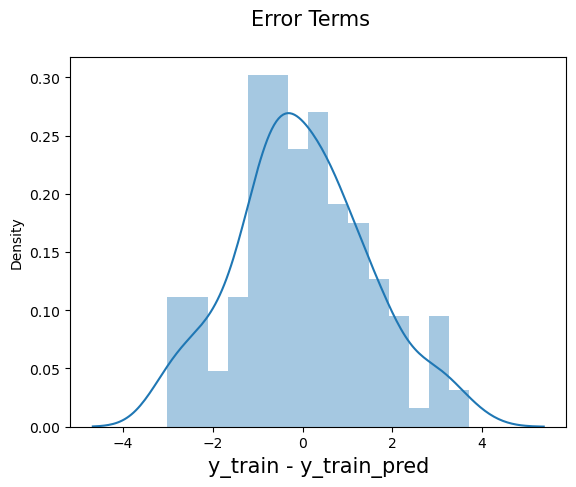

In [39]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()